In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io

In [ ]:
uploaded = files.upload()

dfs = {}
data_list = []

for filename, content in uploaded.items():
    data = pd.read_csv(io.BytesIO(content))
    dfs[filename] = data
    data_list.append({
        "file_name": filename,
        "preview": data.head()
    })
# Xem kết quả
data_list



Saving blinkit_customer_feedback.csv to blinkit_customer_feedback.csv
Saving blinkit_customers.csv to blinkit_customers.csv
Saving blinkit_delivery_performance.csv to blinkit_delivery_performance.csv
Saving blinkit_marketing_performance.csv to blinkit_marketing_performance.csv
Saving blinkit_order_items.csv to blinkit_order_items.csv
Saving blinkit_orders.csv to blinkit_orders.csv
Saving blinkit_products.csv to blinkit_products.csv


[{'file_name': 'blinkit_customer_feedback.csv',
  'preview':    feedback_id    order_id  customer_id  rating  \
  0      2234710  1961864118     30065862       4   
  1      5450964  1549769649      9573071       3   
  2       482108  9185164487     45477575       3   
  3      4823104  9644738826     88067569       4   
  4      3537464  5427684290     83298567       3   
  
                            feedback_text feedback_category sentiment  \
  0         It was okay, nothing special.          Delivery   Neutral   
  1              The order was incorrect.    App Experience  Negative   
  2         It was okay, nothing special.    App Experience   Neutral   
  3      The product met my expectations.    App Experience   Neutral   
  4  Product was damaged during delivery.          Delivery  Negative   
  
    feedback_date  
  0    2024-07-17  
  1    2024-05-28  
  2    2024-09-23  
  3    2023-11-24  
  4    2023-11-20  },
 {'file_name': 'blinkit_customers.csv',
  'preview':    c

In [ ]:
# Kiểm tra dữ liệu thiếu và trùng lặp cho từng file
for filename, data in dfs.items():
    print(f"\n{filename}")

    # Kiểm tra dữ liệu thiếu
    missing = data.isnull().sum()
    if missing.sum() > 0:
        print("Dữ liệu thiếu:")
        print(missing[missing > 0])
    else:
        print("Không có dữ liệu thiếu.")

    # Kiểm tra dòng trùng lặp
    duplicate_rows = data.duplicated().sum()
    if duplicate_rows > 0:
        print(f"Có {duplicate_rows} dòng bị trùng lặp.")
    else:
        print("Không có dòng trùng lặp.")


blinkit_customer_feedback.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.

blinkit_customers.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.

blinkit_delivery_performance.csv
Dữ liệu thiếu:
reasons_if_delayed    1902
dtype: int64
Không có dòng trùng lặp.

blinkit_marketing_performance.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.

blinkit_order_items.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.

blinkit_orders.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.

blinkit_products.csv
Không có dữ liệu thiếu.
Không có dòng trùng lặp.


In [ ]:
# Đặt tên biến tương ứng
orders = dfs['blinkit_orders.csv']
order_items = dfs['blinkit_order_items.csv']
customers = dfs['blinkit_customers.csv']
products = dfs['blinkit_products.csv']
feedback = dfs['blinkit_customer_feedback.csv']
delivery = dfs['blinkit_delivery_performance.csv']
marketing = dfs['blinkit_marketing_performance.csv']

# Merge orders với customers theo customer_id
merged_df = orders.merge(customers, on="customer_id", how="left")

# Merge với order_items theo order_id
merged_df = merged_df.merge(order_items, on="order_id", how="left")

# Merge với feedback theo order_id
merged_df = merged_df.merge(feedback, on="order_id", how="left")

#bMerge với delivery theo order_id (nếu cần thiết)
merged_df = merged_df.merge(delivery, on="order_id", how="left")

# Merge với products theo product_id
merged_df = merged_df.merge(products, on="product_id", how="left")

# Xuất ra file CSV hoàn chỉnh
merged_df.to_csv('blinkit_full_dataset.csv', index=False)
print("Dữ liệu đã được xuất thành công!")

Dữ liệu đã được xuất thành công!


# **Data Preprocessing**

In [ ]:
df = pd.read_csv('blinkit_full_dataset.csv')

# Kích thước dữ liệu
print("Kích thước dữ liệu:", df.shape)
print("\nThông tin tổng quát:")
df.info()

Kích thước dữ liệu: (5000, 46)

Thông tin tổng quát:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id_x           5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status_x       5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id_x   5000 non-null   int64  
 9   store_id                5000 non-null   int64  
 10  customer_name           5000 non-null   object 
 11  email                   5000 non-null   object 
 12  phone                   5000 non-null   int64  
 13  address                 5000 non-null   

In [ ]:
# Kiểm tra dữ liệu thiếu
missing = df.isnull().sum()  # Tính số lượng giá trị thiếu trong từng cột

# Kiểm tra xem có cột nào thiếu dữ liệu không
if missing.sum() > 0:
    print("\nSố lượng dữ liệu thiếu theo cột:")
    print(missing[missing > 0])
else:
    print("\nSố lượng dữ liệu thiếu theo cột: 0")


Số lượng dữ liệu thiếu theo cột:
reasons_if_delayed    1902
dtype: int64


In [ ]:
missing_ratio = df['reasons_if_delayed'].isnull().mean()
print(f"Tỷ lệ dữ liệu thiếu trong 'reasons_if_delayed': {missing_ratio:.2%}")

Tỷ lệ dữ liệu thiếu trong 'reasons_if_delayed': 38.04%


In [ ]:
# Điền giá trị thiếu trong cột 'reasons_if_delayed'
df['reasons_if_delayed'] = df['reasons_if_delayed'].fillna("No reason provided")

# Kiểm tra lại số lượng dữ liệu thiếu trong cột sau khi xử lý
missing_after = df['reasons_if_delayed'].isnull().sum()
print(f"Số lượng dữ liệu thiếu còn lại trong 'reasons_if_delayed': {missing_after}")


Số lượng dữ liệu thiếu còn lại trong 'reasons_if_delayed': 0


In [ ]:
# Tìm các cột trùng lặp trong DataFrame
duplicate_columns = df.T.duplicated().sum()

# Hiển thị số lượng cột trùng lặp
print(f"Số lượng cột trùng lặp trong dataset: {duplicate_columns}")

# Liệt kê các cột trùng lặp:
duplicate_col_names = df.loc[:, df.T.duplicated()].columns
print("Các cột trùng lặp:", list(duplicate_col_names))

Số lượng cột trùng lặp trong dataset: 6
Các cột trùng lặp: ['customer_id_y', 'delivery_partner_id_y', 'promised_time', 'actual_time', 'delivery_status_y', 'price']


In [ ]:
# Xóa các cột trùng lặp (nếu có)
df = df.loc[:, ~df.T.duplicated()]
print("Các cột trùng lặp đã được xóa.")

# Kiểm tra kết quả
df.info()
df.head()

Các cột trùng lặp đã được xóa.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id_x           5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status_x       5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id_x   5000 non-null   int64  
 9   store_id                5000 non-null   int64  
 10  customer_name           5000 non-null   object 
 11  email                   5000 non-null   object 
 12  phone                   5000 non-null   int64  
 13  address                 5000 non-null   object 
 14  area     

,order_id,customer_id_x,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,delivery_partner_id_x,store_id,...,distance_km,reasons_if_delayed,product_name,category,brand,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,...,0.96,No reason provided,Pet Treats,Pet Care,Pillay-Ahuja,795.43,35.0,365,16,57
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,...,0.98,Traffic,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,1259.17,30.0,180,19,65
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,...,3.83,Traffic,Eggs,Dairy & Breakfast,Prasad LLC,1154.80,20.0,7,13,62
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,...,2.76,No reason provided,Orange Juice,Cold Drinks & Juices,Gupta Ltd,1249.69,30.0,180,21,90
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,...,2.63,Traffic,Nuts,Snacks & Munchies,Bahl-Pau,1502.38,35.0,90,12,75


In [ ]:
df = df.rename(columns={'order_total': 'sales'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id_x           5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status_x       5000 non-null   object 
 6   sales                   5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id_x   5000 non-null   int64  
 9   store_id                5000 non-null   int64  
 10  customer_name           5000 non-null   object 
 11  email                   5000 non-null   object 
 12  phone                   5000 non-null   int64  
 13  address                 5000 non-null   object 
 14  area                    5000 non-null   

In [ ]:
# Chuyển các cột sang kiểu datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['promised_delivery_time'] = pd.to_datetime(df['promised_delivery_time'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Chuyển các cột sang kiểu datetime
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
df['feedback_date'] = pd.to_datetime(df['feedback_date'], errors='coerce')

In [ ]:
print("Kiểu dữ liệu sau khi chuyển đổi:")
print(df.dtypes)

print("\n5 dòng đầu tiên:")
print(df.head())

Kiểu dữ liệu sau khi chuyển đổi:
order_id                           int64
customer_id_x                      int64
order_date                datetime64[ns]
promised_delivery_time    datetime64[ns]
actual_delivery_time      datetime64[ns]
delivery_status_x                 object
sales                            float64
payment_method                    object
delivery_partner_id_x              int64
store_id                           int64
customer_name                     object
email                             object
phone                              int64
address                           object
area                              object
pincode                            int64
registration_date         datetime64[ns]
customer_segment                  object
total_orders                       int64
avg_order_value                  float64
product_id                         int64
quantity                           int64
unit_price                       float64
feedback_id             

In [ ]:
# Xuất ra file CSV hoàn chỉnh
df.to_csv('blinkit_dataset.csv', index=False)
print("Dữ liệu đã được xuất thành công!")

# Tải file về máy
files.download('blinkit_dataset.csv')

Dữ liệu đã được xuất thành công!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

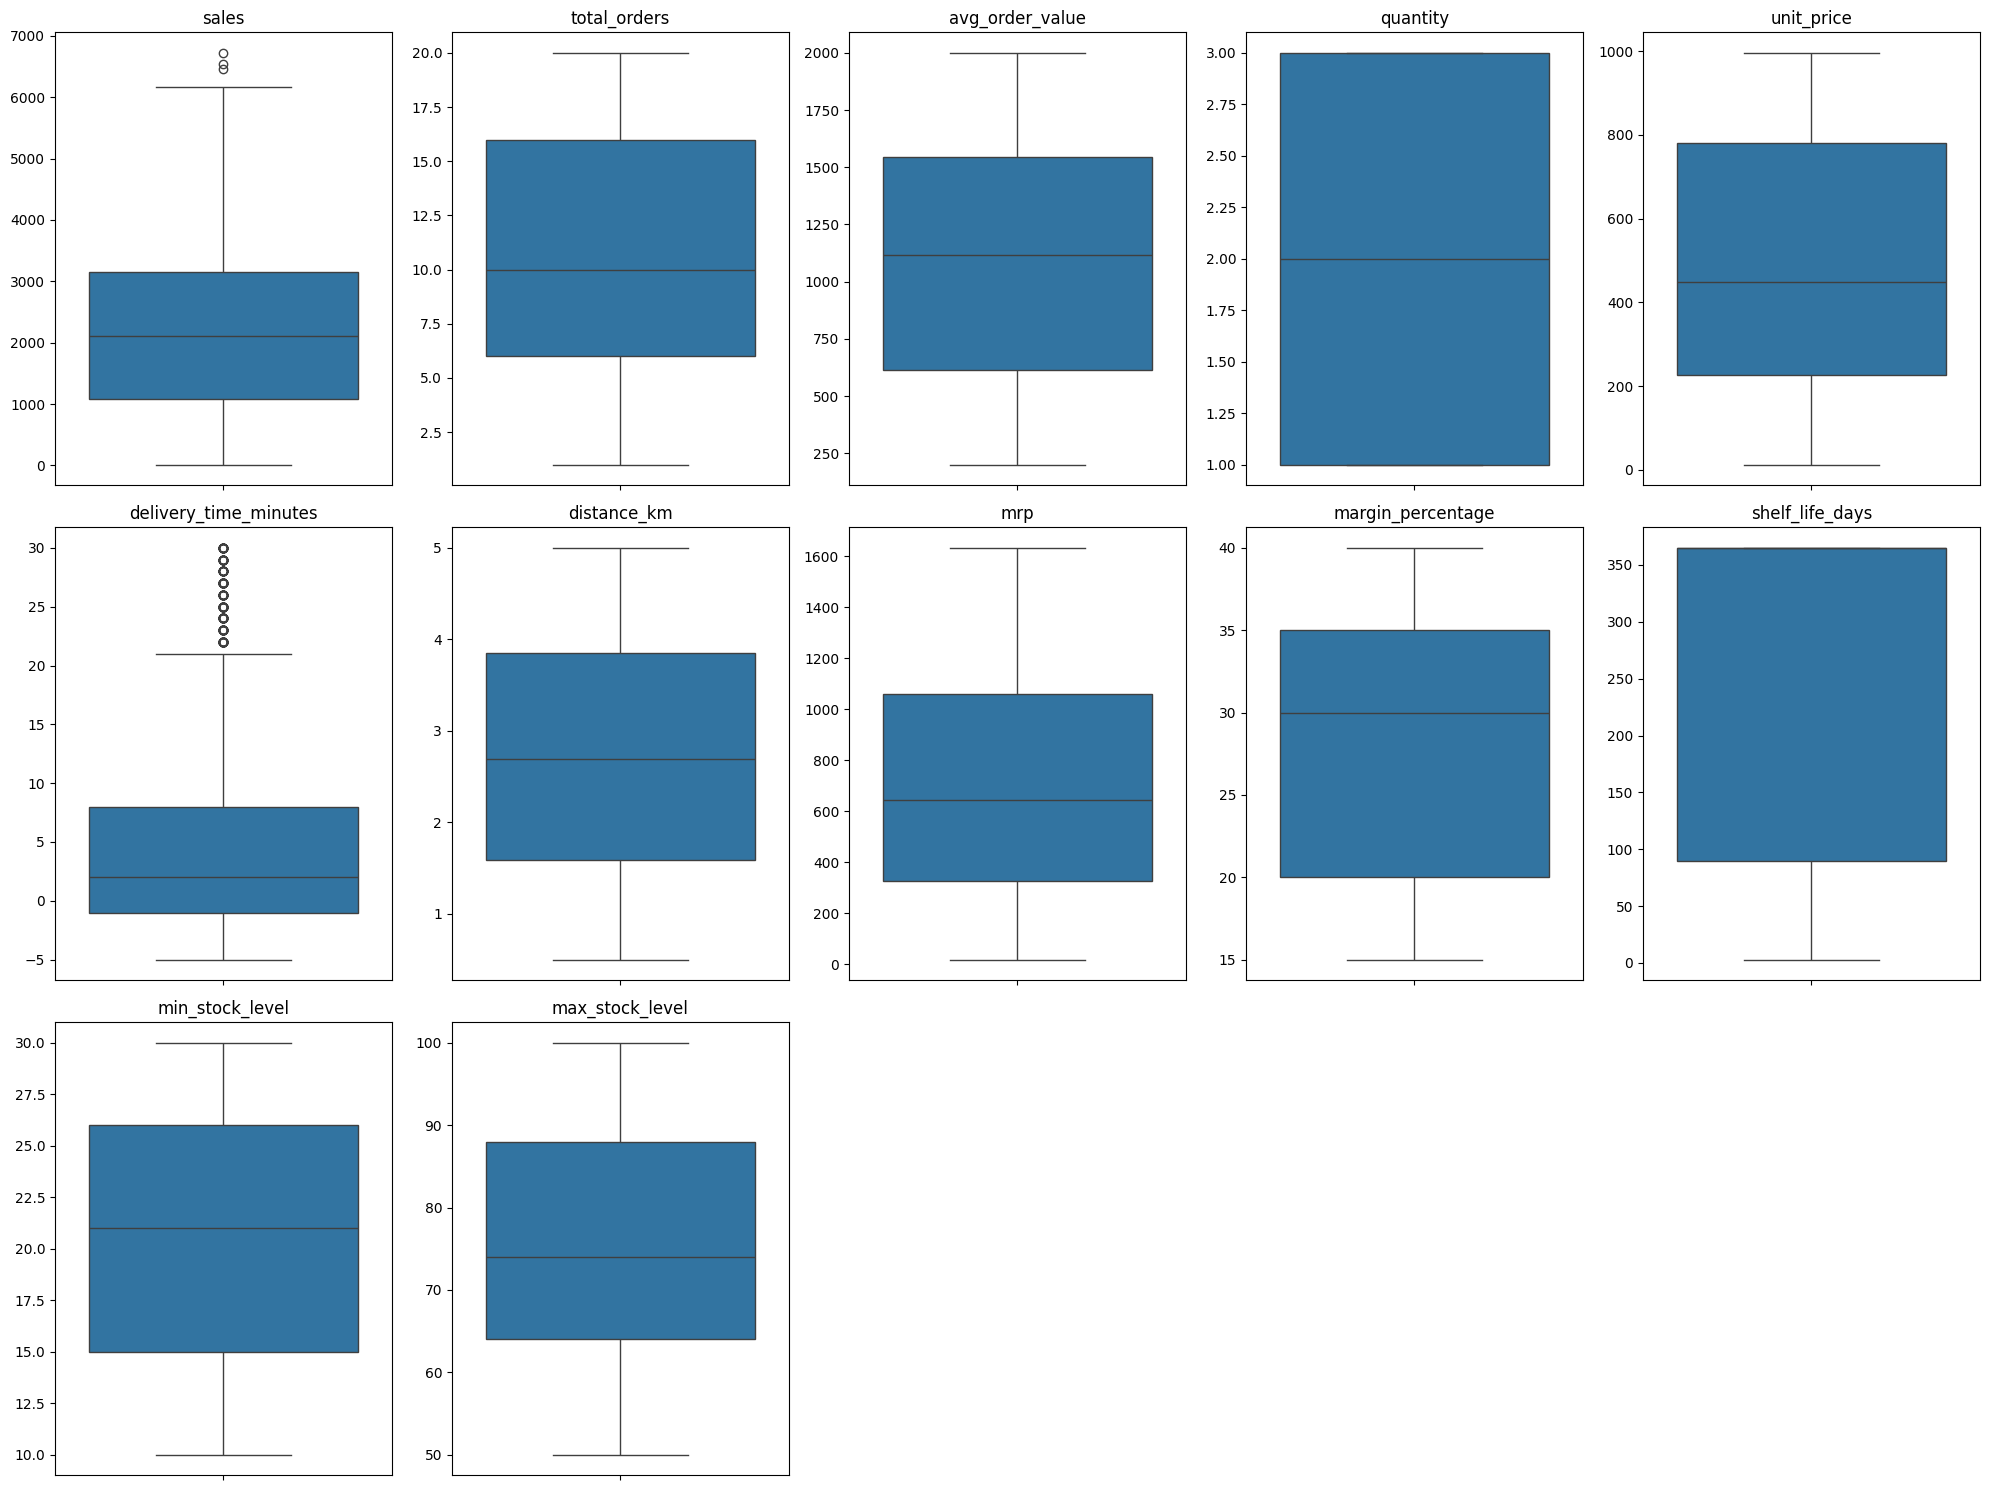

In [ ]:
# Danh sách các cột
numeric_columns = [
    'sales',
    'total_orders',
    'avg_order_value',
    'quantity',
    'unit_price',
    'delivery_time_minutes',
    'distance_km',
    'mrp',
    'margin_percentage',
    'shelf_life_days',
    'min_stock_level',
    'max_stock_level']

# Xác định số hàng và cột (biểu đồ mỗi hàng)
num_cols = 5
num_rows = math.ceil(len(numeric_columns) / num_cols)

# Tạo lưới biểu đồ với kích thước phù hợp
plt.figure(figsize=(20, 5*num_rows))

# Vẽ boxplot cho từng cột
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

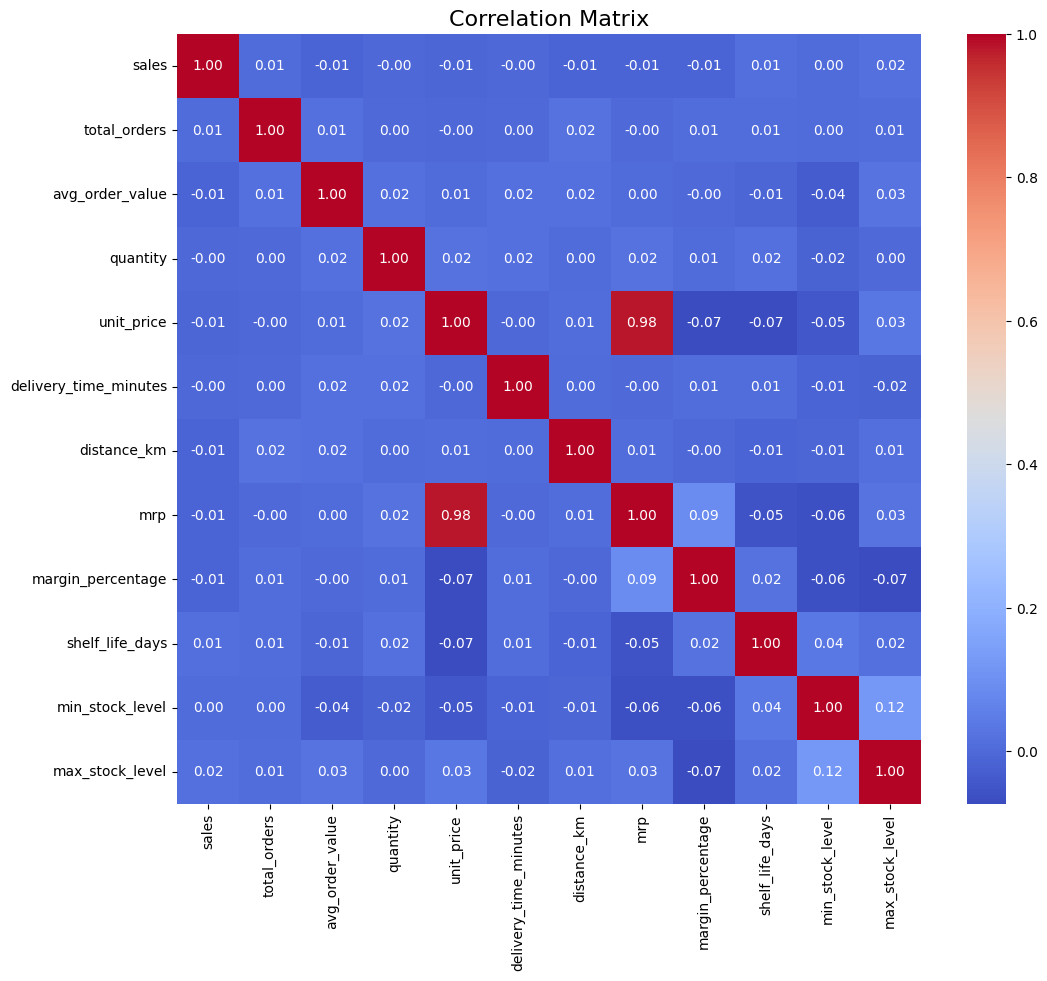

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df[numeric_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()